In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math

In [2]:
car_sales_df = pd.read_csv('Car_sales.csv')

In [3]:
car_sales_df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [4]:
car_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [5]:
car_sales_df.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [6]:
car_sales_df = car_sales_df.drop(['Latest_Launch', 'Vehicle_type', 'Manufacturer', 'Model'], axis='columns')

In [7]:
car_sales_df

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,NaN,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,15.245,NaN,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,17.531,NaN,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,3.493,NaN,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


In [8]:
car_sales_df = car_sales_df.fillna(0)

In [9]:
correlation_df = car_sales_df

In [10]:
correlation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sales_in_thousands   157 non-null    float64
 1   __year_resale_value  157 non-null    float64
 2   Price_in_thousands   157 non-null    float64
 3   Engine_size          157 non-null    float64
 4   Horsepower           157 non-null    float64
 5   Wheelbase            157 non-null    float64
 6   Width                157 non-null    float64
 7   Length               157 non-null    float64
 8   Curb_weight          157 non-null    float64
 9   Fuel_capacity        157 non-null    float64
 10  Fuel_efficiency      157 non-null    float64
 11  Power_perf_factor    157 non-null    float64
dtypes: float64(12)
memory usage: 14.8 KB


In [11]:
correlation_df.isna().sum()

Sales_in_thousands     0
__year_resale_value    0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Power_perf_factor      0
dtype: int64

In [12]:
correlations = correlation_df.corr()

In [13]:
plt.figure(figsize=(100, 100))

<Figure size 10000x10000 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

<AxesSubplot:>

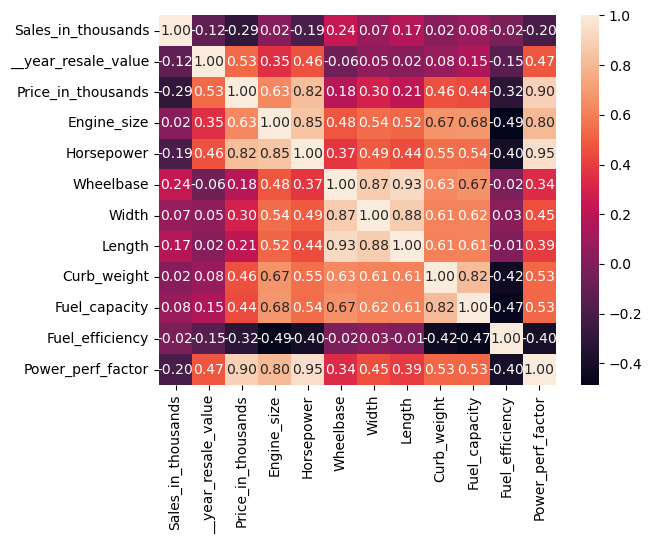

In [14]:
sb.heatmap(correlations, annot=True, fmt='.2f')

In [15]:
X = car_sales_df[['Engine_size', 'Horsepower', 'Power_perf_factor']]

In [16]:
y = car_sales_df[['Price_in_thousands']]

#### Import scikit-learn library


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 

## Model ke-1

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=15)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(133, 3)
(24, 3)
(133, 1)
(24, 1)


In [20]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [21]:
print('Intercept/Bias : ', regression.intercept_)
print('Koefisien : ', regression.coef_)

Intercept/Bias :  [-8.60090198]
Koefisien :  [[-2.88613481 -0.03140794  0.66077481]]


## Persamaan

##### y = ax1 + ax2 + .... + axn + b
##### y = (-2.88613481 * Engine_size) + (-0.03140794 * Horsepower) + (0.66077481 * Power_perf_factor) + (-8.60090198)

### Keterangan
#### a = koefisien
#### b = bias/intercept
#### x = variabel tidak terikat/independent variable

In [22]:
pred = regression.predict(X_test)

In [23]:
rmse = np.sqrt(mean_squared_error(np.array(y_test), pred))
rmse

3.858119815810465

In [24]:
r2_scores = r2_score(y_test, pred)

In [25]:
print(r2_scores)

0.9028544781656904


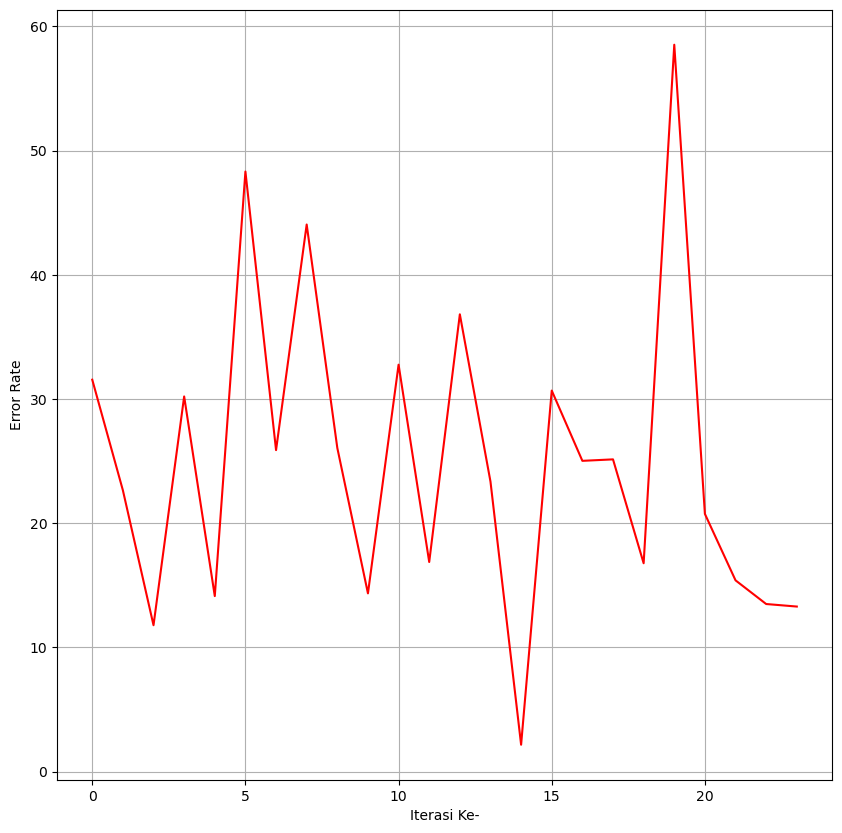

In [26]:
plt.figure(figsize=(10, 10))

plt.plot(pred, color = 'red')
plt.xlabel('Iterasi Ke-')
plt.ylabel('Error Rate')

plt.grid()
plt.show()

## Model ke-2

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.83, random_state=15)

In [28]:
regression2 = LinearRegression()
regression2.fit(X_train, y_train)

LinearRegression()

In [29]:
print('Intercept/bias : ', regression2.intercept_)
print('Coeficient : ', regression2.coef_)

Intercept/bias :  [-8.57901438]
Coeficient :  [[-2.82249901 -0.0316588   0.65943809]]


## Persamaan

##### y = ax1 + ax2 + .... + axn + b
##### y = (-2.82249901 * Engine_size) + (-0.0316588 * Horsepower) + (0.65943809 * Power_perf_factor) + (-8.57901438)

### Keterangan
#### a = koefisien
#### b = bias/intercept
#### x = variabel tidak terikat/independent variable

In [30]:
pred2 = regression2.predict(X_test)

In [31]:
rmse2 = np.sqrt(mean_squared_error(y_true= np.array(y_test), y_pred=pred2))

In [32]:
rmse2

3.831745897852601

In [33]:
score2 = r2_score(y_test, pred2)
score2

0.8949219612041197

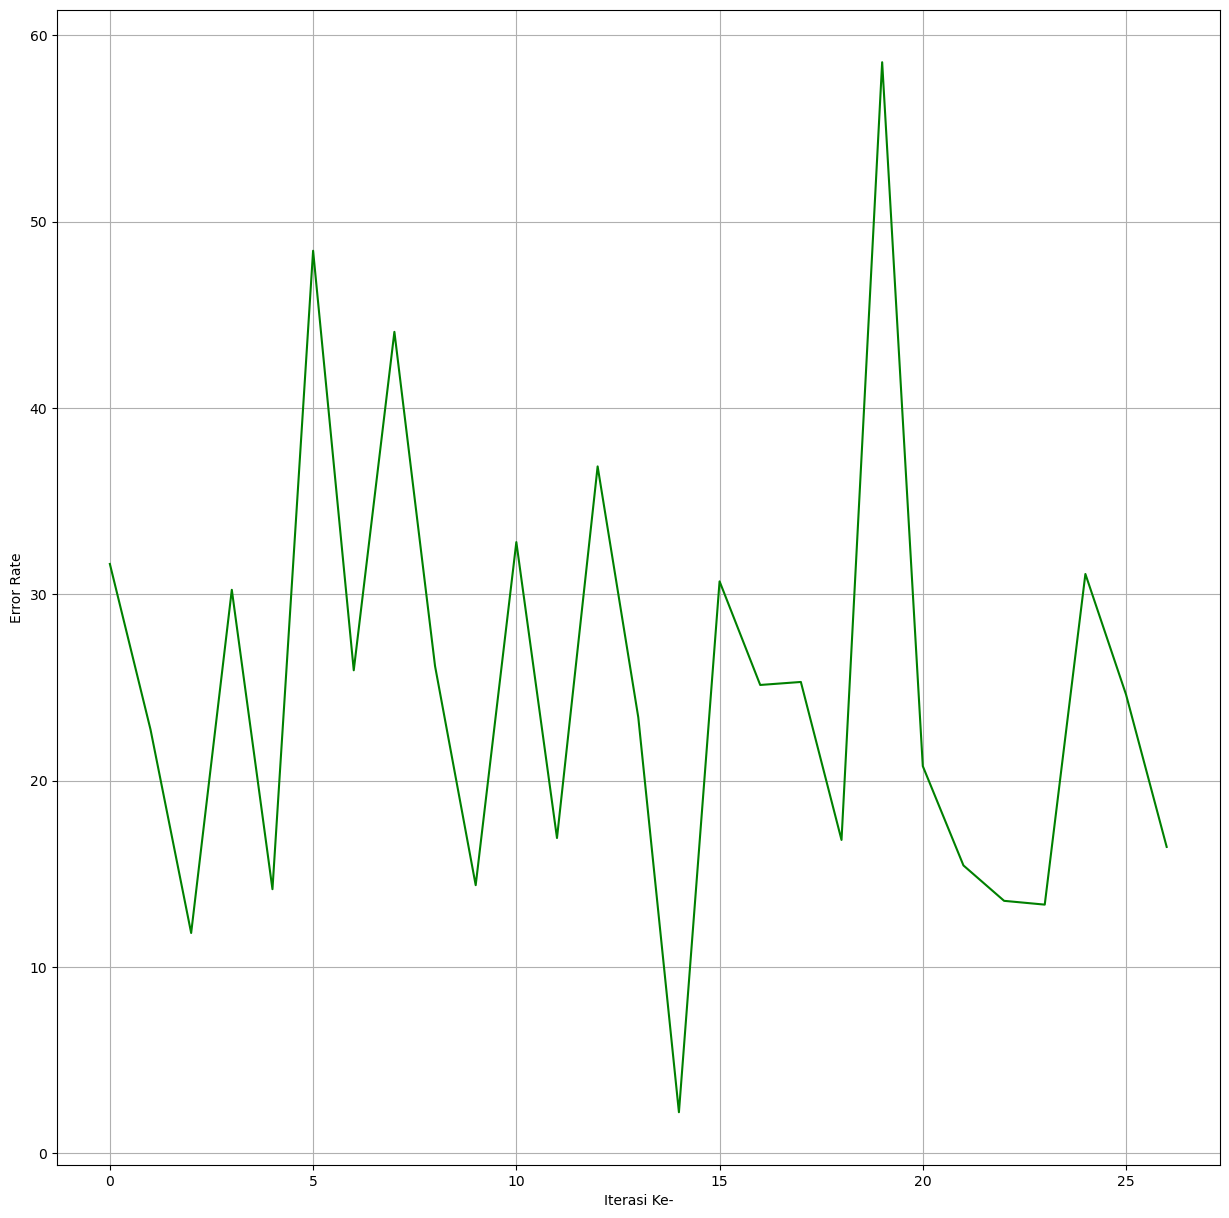

In [34]:
plt.figure(figsize=(15, 15))

plt.plot(pred2, color='g')

plt.xlabel('Iterasi Ke-')
plt.ylabel('Error Rate')
plt.grid()
plt.show()